# Import

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

# Chargement des fichiers

In [17]:
df_france_travail = pd.read_csv("../data/raw/france_travail/dares_defm_stock_france_brut_trim.csv", sep=";")

In [21]:
df_france_travail.head()

,Date,Champ,Type de données,Catégorie,Sexe,Tranche d'âge,Tranche d'heures travaillées,Ancienneté,Formation,Formation (ancienne mesure),Métier recherché,Indemnisabilité,Qualification,Nombre de demandeurs d'emploi
0,1996-T1,France métropolitaine,Brutes,C,Total,Total,Total,Total,Total,Total,Total,Total,Total,324100
1,1996-T1,France métropolitaine,Brutes,C,Hommes,Total,Total,Total,Total,Total,Total,Total,Total,148800
2,1996-T1,France métropolitaine,Brutes,D,Total,Total,Total,Total,Total,Total,Total,Total,Total,181500
3,1996-T1,France métropolitaine,Brutes,E,Total,Total,Total,Total,Total,Total,Total,Total,Total,202200
4,1996-T1,France métropolitaine,Brutes,A,Hommes,Moins de 25 ans,Total,Total,Total,Total,Total,Total,Total,315600


In [22]:
df_insee = pd.read_csv("../data/raw/insee/FD_csv_EEC20.csv", sep=";")

In [27]:
df_insee.head()

,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,2020,4,1,1,1,50,60,2,2,1.0,...,70.0,78.0,1,339.384822,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,1,1,3,50,60,1,2,1.0,...,50.0,64.0,2,68.698748,0.0,NaN,1.0,NaN,1.0,NaN
2,2020,1,1,1,3,50,60,1,2,1.0,...,70.0,64.0,2,68.698748,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,1,1,3,50,60,1,2,1.0,...,50.0,64.0,3,66.700330,2.0,NaN,1.0,NaN,1.0,NaN
4,2020,2,1,1,3,50,60,1,2,1.0,...,70.0,64.0,3,66.700330,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_insee_doc = pd.read_csv("../data/raw/insee/Varmod_EEC_2020.csv", sep=";")

In [31]:
df_insee_doc

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR
0,ANNEE,Année de référence de l'enquête,2020,Année de référence sur 4 positions,CHAR,4.0
1,TRIM,Trimestre de référence de l'enquête,1,1er trimestre de l'année,CHAR,1.0
2,TRIM,Trimestre de référence de l'enquête,2,2e trimestre de l'année,CHAR,1.0
3,TRIM,Trimestre de référence de l'enquête,3,3e trimestre de l'année,CHAR,1.0
4,TRIM,Trimestre de référence de l'enquête,4,4e trimestre de l'année,CHAR,1.0
...,...,...,...,...,...,...
1872,NBTOTE,Nombre d'heures travaillées en moyenne par sem...,97.5,97.5 heures,NUM,3.1
1873,NBTOTE,Nombre d'heures travaillées en moyenne par sem...,98,98 heures,NUM,3.1
1874,NBTOTE,Nombre d'heures travaillées en moyenne par sem...,98.5,98.5 heures,NUM,3.1
1875,NBTOTE,Nombre d'heures travaillées en moyenne par sem...,99,99 heures,NUM,3.1


# Sanity check

In [51]:
df_france_travail.shape

(78838, 14)

In [52]:
df_insee.shape

(319398, 124)

In [45]:
df_france_travail.columns

Index(['Date', 'Champ', 'Type de données', 'Catégorie', 'Sexe',
       'Tranche d'âge', 'Tranche d'heures travaillées', 'Ancienneté',
       'Formation', 'Formation (ancienne mesure)', 'Métier recherché',
       'Indemnisabilité', 'Qualification', 'Nombre de demandeurs d'emploi'],
      dtype='object')

In [53]:
df_insee.columns

Index(['ANNEE', 'TRIM', 'CATAU2010R', 'METRODOM', 'TYPMEN7', 'AGE3', 'AGE5',
       'COURED', 'ENFRED', 'NFRRED',
       ...
       'DIP11', 'CSTOTPRM', 'IDENTM', 'EXTRIAN', 'EMPNBH', 'HREC', 'HHCE',
       'HPLUSA', 'JOURTR', 'NBTOTE'],
      dtype='object', length=124)

In [46]:
df_france_travail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78838 entries, 0 to 78837
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Date                           78838 non-null  object
 1   Champ                          78838 non-null  object
 2   Type de données                78838 non-null  object
 3   Catégorie                      78838 non-null  object
 4   Sexe                           78838 non-null  object
 5   Tranche d'âge                  78838 non-null  object
 6   Tranche d'heures travaillées   78838 non-null  object
 7   Ancienneté                     78838 non-null  object
 8   Formation                      78838 non-null  object
 9   Formation (ancienne mesure)    78838 non-null  object
 10  Métier recherché               78838 non-null  object
 11  Indemnisabilité                78838 non-null  object
 12  Qualification                  78838 non-null  object
 13  N

In [54]:
df_insee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319398 entries, 0 to 319397
Columns: 124 entries, ANNEE to NBTOTE
dtypes: float64(105), int64(13), object(6)
memory usage: 302.2+ MB


# Qualité

In [48]:
df_france_travail.isna().mean().sort_values(ascending=False).head(10)

Date                            0.0
Champ                           0.0
Type de données                 0.0
Catégorie                       0.0
Sexe                            0.0
Tranche d'âge                   0.0
Tranche d'heures travaillées    0.0
Ancienneté                      0.0
Formation                       0.0
Formation (ancienne mesure)     0.0
dtype: float64

In [55]:
df_insee.isna().mean().sort_values(ascending=False).head(10)

MRPASSC    0.998312
MRPASSA    0.998312
MRPASSB    0.998312
RAISON     0.994740
MRH        0.994452
MRI        0.994452
MRJ        0.994452
MRK        0.994452
MRL        0.994452
HREC       0.993118
dtype: float64

In [49]:
df_france_travail.duplicated().sum()

np.int64(0)

In [56]:
df_insee.duplicated().sum()

np.int64(971)

# Premiers insights

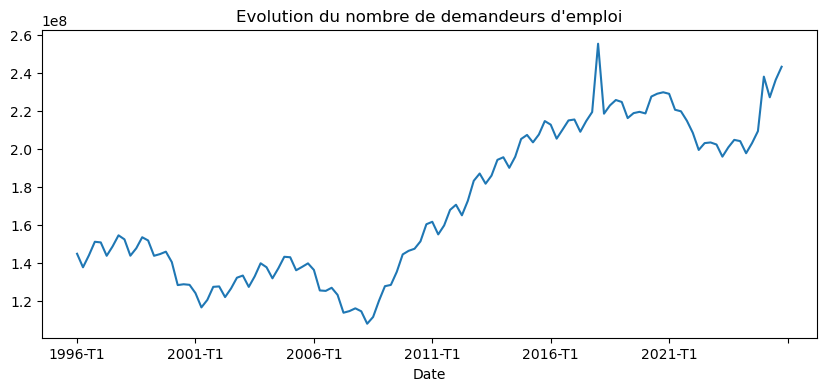

In [62]:
df_france_travail.groupby("Date")["Nombre de demandeurs d'emploi"].sum().plot(figsize=(10,4))
plt.title("Evolution du nombre de demandeurs d'emploi")
plt.show()

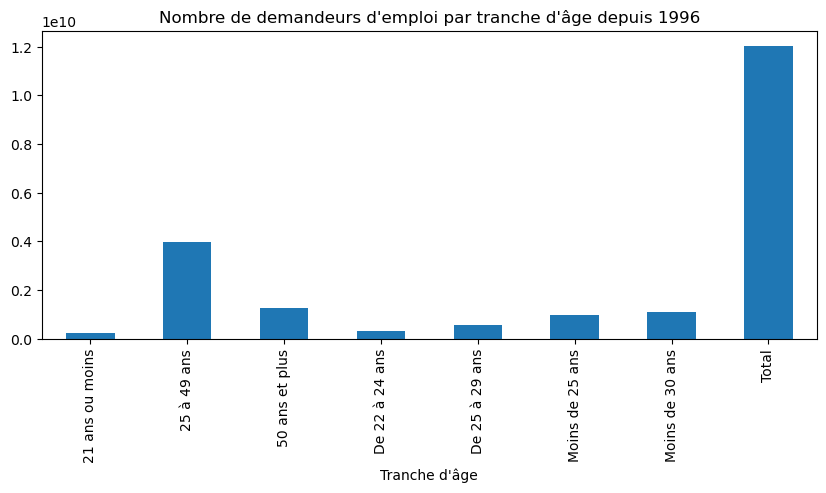

In [76]:
df_france_travail.groupby("Tranche d'âge")["Nombre de demandeurs d'emploi"].sum().plot.bar(figsize=(10,4))
plt.title("Nombre de demandeurs d'emploi par tranche d'âge depuis 1996")
plt.show()